In [14]:
from os import listdir, makedirs, remove
from os.path import isfile, join
from collections import defaultdict,OrderedDict
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
months = ['ukraine-russia-master/2022-02', 'ukraine-russia-master/2022-03', 'ukraine-russia-master/2022-04',
         'ukraine-russia-master/2022-05', 'ukraine-russia-master/2022-06', 'ukraine-russia-master/2022-07',
         'ukraine-russia-master/2022-08', 'ukraine-russia-master/2022-09', 'ukraine-russia-master/2022-10']

In [28]:
tweets_per_day = defaultdict(int)
tweets_per_month = defaultdict(int)
for month in tqdm(months):
    path = month
    month_num = month[22:]
    files = [f for f in listdir(path) if (isfile(join(path, f)))]
    for file in files:
        with open(join(path, file), 'r') as fp:
            date = file[20:-7]
            x = len(fp.readlines())
            tweets_per_day[date] += x
            tweets_per_month[month_num] += x

100%|█████████████████████████████████████████████| 9/9 [00:24<00:00,  2.73s/it]


In [29]:
tweets_per_day_ordered = OrderedDict(sorted(tweets_per_day.items()))
tweets_per_month_ordered = OrderedDict(sorted(tweets_per_month.items()))

In [30]:
tweets_per_month_ordered

OrderedDict([('2022-02', 28908101),
             ('2022-03', 125508593),
             ('2022-04', 81322963),
             ('2022-05', 58093079),
             ('2022-06', 41015679),
             ('2022-07', 35406947),
             ('2022-08', 35457520),
             ('2022-09', 46660730),
             ('2022-10', 2114833)])

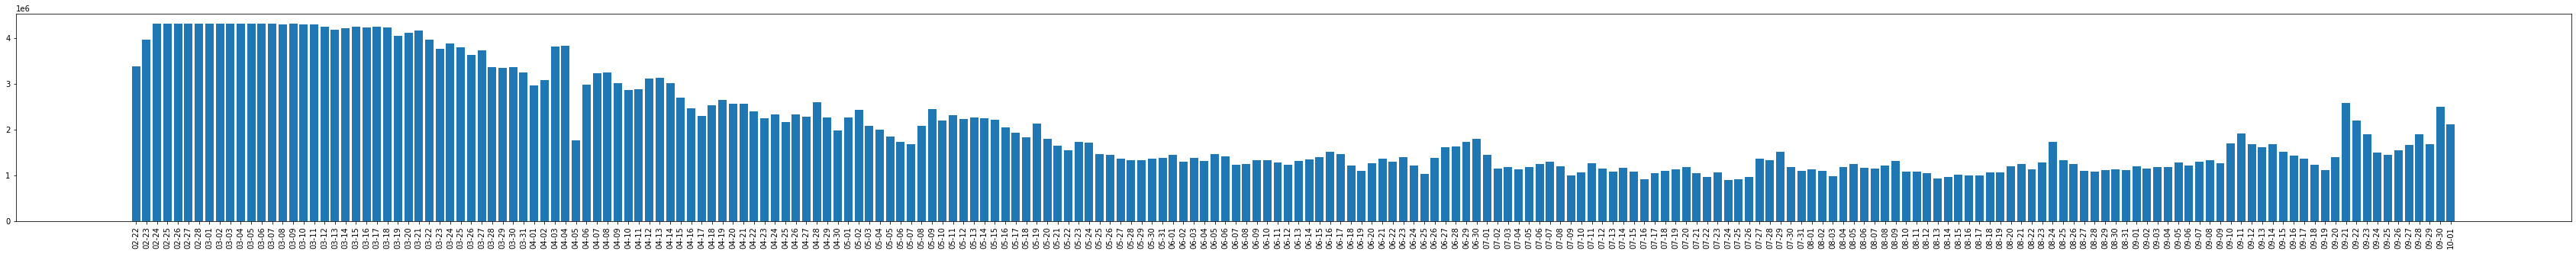

In [31]:
names = list(tweets_per_day_ordered.keys())
values = list(tweets_per_day_ordered.values())
plt.figure(figsize=(60,5))
plt.bar(range(len(tweets_per_day_ordered)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

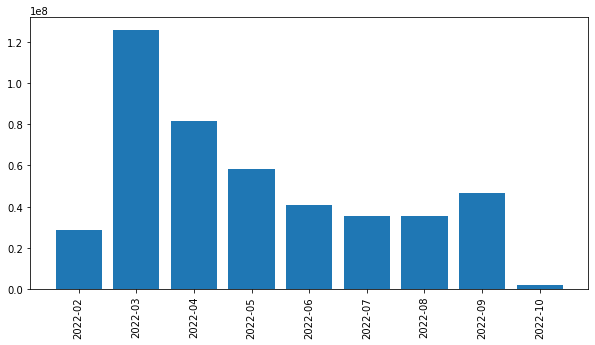

In [33]:
names = list(tweets_per_month_ordered.keys())
values = list(tweets_per_month_ordered.values())
plt.figure(figsize=(10,5))
plt.bar(range(len(tweets_per_month_ordered)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()